In [544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [468]:
train_df = pd.read_csv('data/Data_Train.csv')
ntrain = train_df.shape[0]
train_df.head()

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,5274,08/07/2018,2266,17,27.4,44,1.7,2000,14.0,1.17,0.0,0.0,Yes
1,1,1185,19/01/2018,648,8,-2.5,50,1.0,1281,-11.5,0.00,0.0,0.0,Yes
2,2,6473,27/08/2018,886,16,24.7,85,1.2,1143,22.0,0.99,0.0,0.0,Yes
3,3,602,26/12/2017,127,1,-1.5,62,1.3,2000,-7.8,0.00,0.0,0.0,Yes
4,4,5656,24/07/2018,735,15,35.8,47,2.2,1029,22.7,1.51,0.0,0.0,Yes


In [469]:
test_df = pd.read_csv('data/Data_Test.csv')
ntest = test_df.shape[0]
test_df.head()

,Unnamed: 0,ID,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,0,7274,30/09/2018,1,17.5,66,0.5,2000,11.0,0.00,0.0,0.0,No
1,1,7122,23/09/2018,17,24.1,41,2.4,2000,10.0,1.17,0.0,0.0,Yes
2,2,7510,09/10/2018,21,16.8,52,1.6,2000,6.8,0.00,0.0,0.0,No
3,3,8171,06/11/2018,10,11.7,62,0.5,521,4.6,0.77,0.0,0.0,No
4,4,7053,20/09/2018,20,19.1,77,2.2,1834,14.9,0.00,0.0,0.0,Yes


In [470]:
all_df = pd.concat([train_df, test_df])
all_df.sample(5)

,Unnamed: 0,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
2761,2761,2566,17/03/2018,624.0,21,7.4,54,2.0,1142,-1.3,0.00,0.0,0.0,Yes
4126,4126,4675,13/06/2018,2479.0,18,23.4,63,3.6,1245,15.9,0.50,0.0,0.0,Yes
1248,1248,6757,08/09/2018,1273.0,12,25.2,36,2.4,1995,9.0,2.93,0.0,0.0,Yes
4525,4525,4794,18/06/2018,2040.0,17,29.5,36,3.7,1786,12.8,1.94,0.0,0.0,Yes
5980,5980,423,18/12/2017,116.0,14,0.5,76,NaN,364,-3.2,0.17,0.0,4.2,Yes


In [471]:
all_df = all_df.drop(columns=all_df.columns[0])

In [472]:
# Missing Values and columns
all_df.isnull().sum()

ID                              0
Date                            0
Rented Bike Count            1752
Hour                            0
Temperature(°C)                 0
Humidity(%)                     0
Wind speed (m/s)              218
Visibility (10m)                0
Dew point temperature(°C)       0
Solar Radiation (MJ/m2)         0
Rainfall(mm)                  218
Snowfall (cm)                 218
Functioning Day                 0
dtype: int64

In [473]:
# Impute missing wind speed
median_wind_speed = all_df['Wind speed (m/s)'].median()
all_df['Wind speed (m/s)'].fillna(median_wind_speed, inplace=True)

# Impute missing Rainfall
mode_rainfall = all_df['Rainfall(mm)'].mode()
all_df['Rainfall(mm)'].fillna(mode_rainfall.iloc[0], inplace=True)

# Impute missing Snowfall
mode_snowfall = all_df['Snowfall (cm)'].mode()
all_df['Snowfall (cm)'].fillna(mode_snowfall.iloc[0], inplace=True)

all_df.sample(5)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
1940,4502,06/06/2018,1444.0,13,27.3,52,1.5,613,16.5,3.21,0.0,0.0,Yes
2268,3500,25/04/2018,1958.0,19,18.2,36,3.5,2000,2.8,0.29,0.0,0.0,Yes
5241,6484,28/08/2018,281.0,3,22.9,93,0.6,2000,21.7,0.00,0.0,0.0,Yes
1939,4901,23/06/2018,375.0,4,21.6,47,0.4,1985,9.7,0.00,0.0,0.0,Yes
237,5806,30/07/2018,1875.0,21,33.1,48,1.1,2000,20.6,0.00,0.0,0.0,Yes


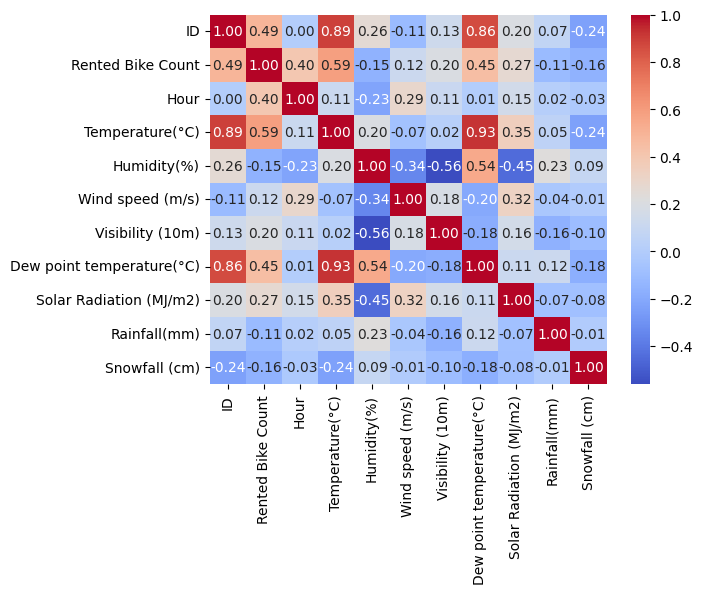

In [474]:
correlation_matrix = all_df.iloc[:ntrain].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [475]:
def classify_season(date):
    try:
        date_object = datetime.strptime(date, '%d/%m/%Y')
        month = date_object.month

        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'
    except ValueError:
        return None

all_df['Season'] = all_df['Date'].apply(classify_season)
all_df.sample(5)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season
1117,1312,24/01/2018,149.0,15,-10.8,29,3.8,2000,-25.4,1.06,0.0,0.7,Yes,Winter
1615,8446,17/11/2018,NaN,21,5.0,42,1.5,1927,-6.8,0.00,0.0,0.0,Yes,Fall
816,3767,06/05/2018,1290.0,22,16.4,80,1.2,2000,12.9,0.00,0.0,0.0,Yes,Spring
6683,5271,08/07/2018,1517.0,14,27.1,41,1.4,1941,12.7,3.24,0.0,0.0,Yes,Summer
644,8494,19/11/2018,NaN,21,5.8,44,2.2,1205,-5.5,0.00,0.0,0.0,Yes,Fall


In [476]:
def classify_rainfall(rainfall):
    if rainfall == 0:
        return 'No Rain'
    elif rainfall > 0 and rainfall <= 2.5: 
        return 'Light'
    elif rainfall > 2.6 and rainfall <= 7.6:
        return 'Moderate'
    elif rainfall > 7.6:
        return 'Heavy'
    else:
        return rainfall

def classify_snow(snowfall):
    if snowfall == 0:
        return 0
    else:
        return 1

all_df['RainIntensity'] = all_df['Rainfall(mm)'].apply(classify_rainfall)   
all_df['Snowfall (cm)'] = all_df['Snowfall (cm)'].apply(classify_snow)
all_df.sample(5)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season,RainIntensity
5997,3428,22/04/2018,32.0,19,15.2,64,1.7,1185,8.4,0.02,0.5,0,Yes,Spring,Light
1296,1800,13/02/2018,211.0,23,2.4,59,3.2,2000,-4.8,0.00,0.0,0,Yes,Winter,No Rain
3640,5769,29/07/2018,456.0,8,28.6,63,0.8,1867,20.8,1.00,0.0,0,Yes,Summer,No Rain
1584,3830,09/05/2018,1188.0,13,20.1,36,1.1,1933,4.5,3.34,0.0,0,Yes,Spring,No Rain
1078,7931,27/10/2018,NaN,10,9.5,46,3.7,1871,-1.5,1.49,0.0,0,Yes,Fall,No Rain


In [478]:
limits = [0.2, 0.4, 0.66, 0.9]

ranges = all_df['Temperature(°C)'].quantile([limit for limit in limits])
solar_ranges = all_df['Solar Radiation (MJ/m2)'].quantile([limit for limit in limits])
humidity_ranges = all_df['Humidity(%)'].quantile([limit for limit in limits])

print(f'Very Cold: < {ranges[limits[0]]}')
print(f'Cold: {ranges[limits[0]]} - {ranges[limits[1]]}')
print(f'Moderate: {ranges[limits[1]]} - {ranges[limits[2]]}')
print(f'Warm: {ranges[limits[2]]} - {ranges[limits[3]]}')
print(f"Hot: > {ranges[limits[3]]}")

Very Cold: < 1.5
Cold: 1.5 - 9.6
Moderate: 9.6 - 19.7
Warm: 19.7 - 28.0
Hot: > 28.0


In [479]:
def classify_climate(temperature):
    if temperature < ranges[limits[0]]:
        return 'Very Cold'
    elif temperature >= ranges[limits[0]] and temperature <= ranges[limits[1]]:
        return 'Cold'
    elif temperature >= ranges[limits[1]] and temperature <= ranges[limits[2]]:
        return 'Moderate'
    elif temperature >= ranges[limits[2]] and temperature <= ranges[limits[3]]:
        return 'Warm'
    else:
        return 'Hot'

all_df['Climate'] = all_df['Temperature(°C)'].apply(classify_climate)
all_df.sample(7)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season,RainIntensity,Climate
3581,1289,23/01/2018,181.0,16,-10.1,34,4.3,2000,-23.0,0.74,0.0,1,Yes,Winter,No Rain,Very Cold
3093,4951,25/06/2018,785.0,6,21.3,81,0.7,604,17.8,0.05,0.0,0,Yes,Summer,No Rain,Warm
3881,6903,14/09/2018,1199.0,14,26.3,58,1.5,1986,17.3,1.37,0.0,0,Yes,Fall,No Rain,Warm
5754,1912,18/02/2018,440.0,15,5.0,16,2.0,1970,-18.8,1.42,0.0,0,Yes,Winter,No Rain,Cold
2739,5201,05/07/2018,1105.0,16,28.2,71,1.7,2000,22.4,0.96,0.0,0,Yes,Summer,No Rain,Hot
2229,4671,13/06/2018,2088.0,14,26.6,50,2.4,1119,15.3,2.95,0.0,0,Yes,Summer,No Rain,Warm
6720,2329,08/03/2018,49.0,0,5.2,83,1.5,733,2.5,0.00,0.5,0,Yes,Spring,Light,Cold


In [480]:
def classify_solar(radiation):
    if radiation < solar_ranges[limits[0]]:
        return 'Very Low'
    elif radiation >= solar_ranges[limits[0]] and radiation <= solar_ranges[limits[1]]:
        return 'Low'
    elif radiation >= solar_ranges[limits[1]] and radiation <= solar_ranges[limits[2]]:
        return 'Moderate'
    elif radiation >= solar_ranges[limits[2]] and radiation <= solar_ranges[limits[3]]:
        return 'High'
    else:
        return 'Very High'

all_df['Solar Intensity'] = all_df['Solar Radiation (MJ/m2)'].apply(classify_solar)
all_df.sample(7)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season,RainIntensity,Climate,Solar Intensity
6257,4518,07/06/2018,288.0,5,17.8,91,1.5,393,16.3,0.00,0.0,0,Yes,Summer,No Rain,Moderate,Low
1700,8163,06/11/2018,NaN,2,9.7,78,0.0,619,6.0,0.00,0.0,0,No,Fall,No Rain,Moderate,Low
1966,1539,03/02/2018,123.0,2,-3.4,82,4.2,184,-6.0,0.00,0.0,0,Yes,Winter,No Rain,Very Cold,Low
1334,7073,21/09/2018,NaN,16,21.5,78,1.2,2000,17.4,0.51,0.0,0,Yes,Fall,No Rain,Warm,High
4274,6602,02/09/2018,930.0,1,22.8,59,1.5,2000,14.3,0.00,0.0,0,Yes,Fall,No Rain,Warm,Low
988,7790,21/10/2018,NaN,13,19.3,24,1.5,1745,-1.8,2.40,0.0,0,Yes,Fall,No Rain,Moderate,Very High
5986,6720,06/09/2018,562.0,23,23.9,71,4.7,1982,18.3,0.00,0.0,0,Yes,Fall,No Rain,Warm,Low


In [481]:
def classify_humidity(humidity):
    if humidity < humidity_ranges[limits[0]]:
        return 'Very Low'
    elif humidity >= humidity_ranges[limits[0]] and humidity <= humidity_ranges[limits[1]]:
        return 'Low'
    elif humidity >= humidity_ranges[limits[1]] and humidity <= humidity_ranges[limits[2]]:
        return 'Moderate'
    elif humidity >= humidity_ranges[limits[2]] and humidity <= humidity_ranges[limits[3]]:
        return 'High'
    else:
        return 'Very High'

all_df['Humidity'] = all_df['Humidity(%)'].apply(classify_humidity)
all_df.sample(7)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season,RainIntensity,Climate,Solar Intensity,Humidity
1683,7086,22/09/2018,NaN,5,18.8,96,0.2,973,18.1,0.00,6.5,0,Yes,Fall,Moderate,Moderate,Low,Very High
6526,2966,03/04/2018,870.0,13,20.1,61,2.6,1117,12.3,1.01,0.0,0,Yes,Spring,No Rain,Warm,High,Moderate
2650,1778,13/02/2018,146.0,1,-5.5,60,1.5,1994,-12.0,0.00,0.0,0,Yes,Winter,No Rain,Very Cold,Low,Moderate
5979,5140,03/07/2018,233.0,3,22.8,98,0.0,1734,22.4,0.00,0.0,0,Yes,Summer,No Rain,Warm,Low,Very High
1093,562,24/12/2017,3.0,9,4.6,94,0.9,90,3.7,0.00,6.4,0,Yes,Winter,Moderate,Cold,Low,Very High
5910,4465,05/06/2018,927.0,0,20.5,71,2.8,1204,15.0,0.00,0.0,0,Yes,Summer,No Rain,Warm,Low,High
3563,1267,22/01/2018,170.0,18,1.1,96,3.0,187,0.5,0.00,3.3,1,Yes,Winter,Moderate,Very Cold,Low,Very High


c:\Users\Dilon\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Dilon\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


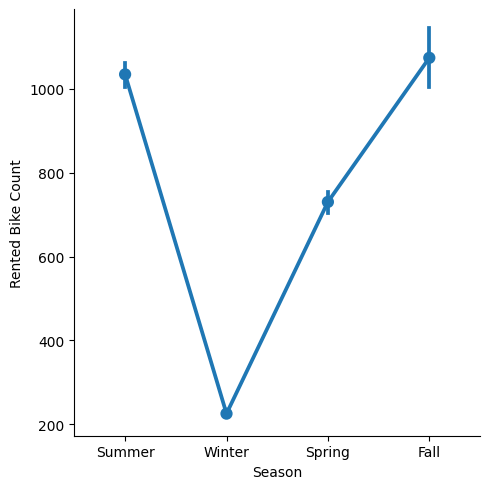

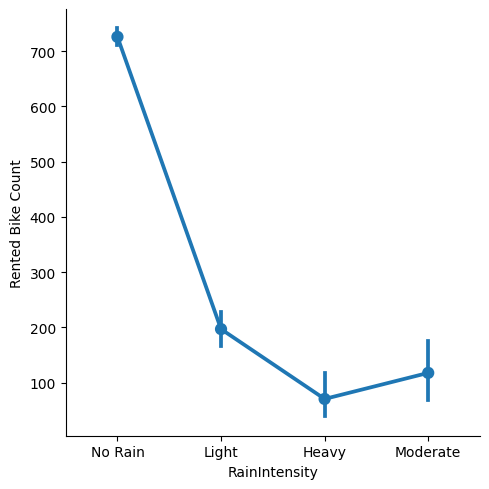

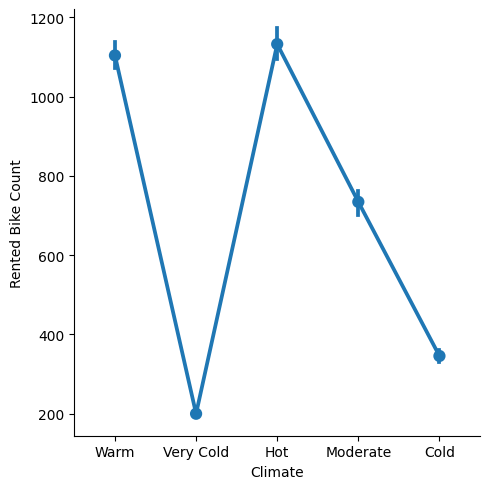

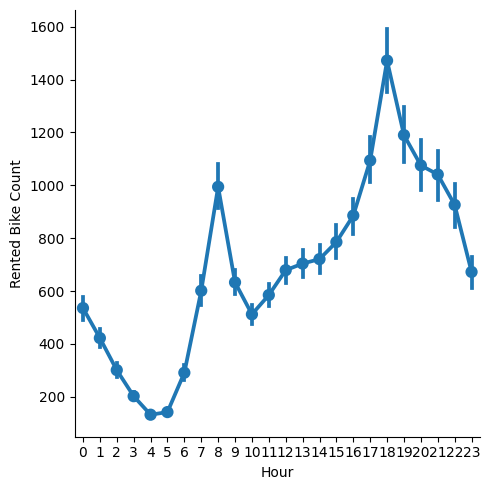

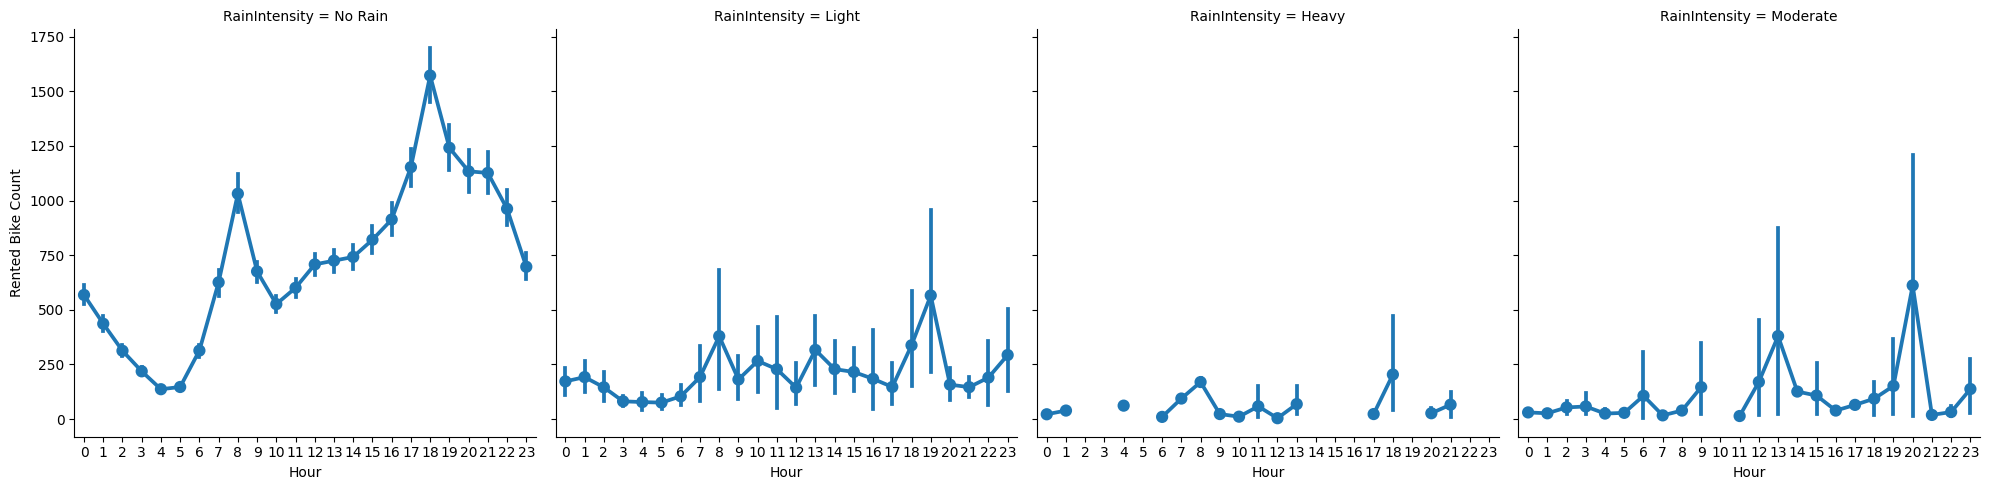

In [482]:
sns.catplot(data=all_df, x='Season', y='Rented Bike Count', kind='point')
sns.catplot(data=all_df, x='RainIntensity', y='Rented Bike Count', kind='point')
sns.catplot(data=all_df, x='Climate', y='Rented Bike Count', kind='point')
sns.catplot(data=all_df, x='Hour', y='Rented Bike Count', kind='point')
sns.catplot(data=all_df, x='Hour', y='Rented Bike Count', kind='point', col='RainIntensity')

In [503]:
string_features = ['Season', 'Climate', 'RainIntensity', 'Humidity', 'Solar Intensity', 'Functioning Day']
for features in string_features:
    all_df[features] = LabelEncoder().fit_transform(all_df[features])

all_df.sample(5)

,ID,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Season,RainIntensity,Climate,Solar Intensity,Humidity
3826,1913,18/02/2018,404.0,16,5.1,16,1.8,1998,-18.7,1.17,0.0,0,1,3,3,0,0,4
3088,3741,05/05/2018,1562.0,20,19.7,53,2.0,1841,9.8,0.00,0.0,0,1,1,3,2,1,2
6911,6335,21/08/2018,1828.0,22,26.1,76,1.2,1867,21.5,0.00,0.0,0,1,2,3,4,1,0
52,7911,26/10/2018,NaN,14,12.7,95,1.9,255,11.9,0.09,5.5,0,1,0,2,2,2,3
1031,7540,11/10/2018,NaN,3,6.7,71,1.0,2000,1.8,0.00,0.0,0,1,0,3,0,1,0


In [535]:
train_data = all_df[:ntrain]
test_data = all_df[ntrain:]

x_train = train_data[['Hour', 'Season', 'Climate', 'RainIntensity', 'Humidity', 'Solar Intensity','Snowfall (cm)', 'Functioning Day', 'Wind speed (m/s)']]
x_test = test_data[['Hour', 'Season', 'Climate', 'RainIntensity', 'Humidity', 'Solar Intensity','Snowfall (cm)', 'Functioning Day', 'Wind speed (m/s)']]

y_train = train_data[['Rented Bike Count']]
y_test = test_data[['Rented Bike Count']]

In [547]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

pred_knn = knn_model.predict(x_test)
pred_knn_train = knn_model.predict(x_train)
print(f"Accuracy Score with KNN: {accuracy_score(y_train, pred_knn_train) * 100}")

pred_rf = rf_model.predict(x_test)
pred_rf_train = rf_model.predict(x_train)
print(f'Accuracy Score with Random Forest: {accuracy_score(y_train, pred_rf_train) * 100}')

c:\Users\Dilon\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy Score with KNN: 85.17408675799086
Accuracy Score with Random Forest: 85.21689497716895


In [549]:
result = pd.DataFrame({'ID': test_data['ID'], 'Rented Bike Count': pred_knn.astype(int)})

output_path = 'data/submission.csv'

result.to_csv(output_path, index=False)